In [1]:
%matplotlib notebook
import cvxpy as cp
import dccp
import torch
import numpy as np
from cvxpylayers.torch import CvxpyLayer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.metrics import zero_one_loss, confusion_matrix
from scipy.io import arff
import pandas as pd
import time
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
import matplotlib.patches as mpatches
import json
import random
import math
import os, psutil
from datetime import datetime

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIG_SIZE = 14

# Burden VS accuracy

<IPython.core.display.Javascript object>


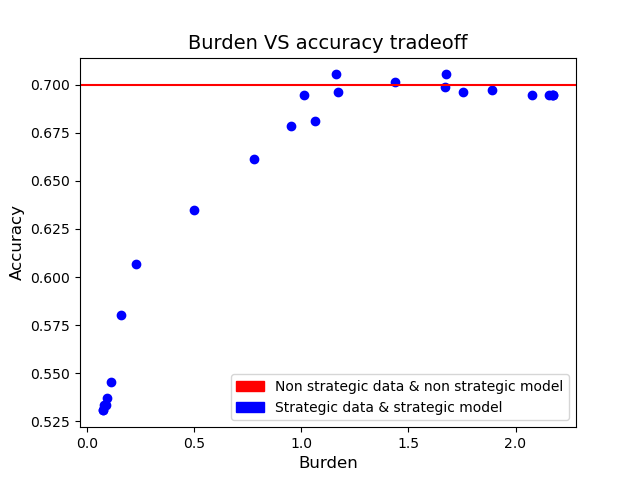

C:\Users\sagil\Anaconda3\envs\funcPred\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [88]:
burdens = []
accuracies = []
path = "C:/Users/sagil/Desktop/nir_project/models/FINAL/burden/tradeoff"

for root,d_names,f_names in os.walk(path):
    if "val_burdens.csv" in f_names:
        val_burdens = pd.read_csv(root + '/val_burdens.csv')
        burden = val_burdens.values[-1][1]
        burdens.append(burden)
        val_errors = pd.read_csv(root + '/val_errors.csv')
        acc = 1 - val_errors.values[-1][1]
        accuracies.append(acc)


fig = plt.figure()

plt.rc('axes', titlesize=BIG_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.title('Burden VS accuracy tradeoff')
plt.xlabel('Burden')
plt.ylabel('Accuracy')
ax = fig.add_subplot(111)
ax.scatter(burdens, accuracies, color='b')
plt.axhline(y=0.7, linestyle='-', color='r')

red_patch = mpatches.Patch(color='r', label='Non strategic data & non strategic model')
blue_patch = mpatches.Patch(color='b', label='Strategic data & strategic model')

plt.legend(handles=[red_patch, blue_patch])
plt.savefig(path + '/burden_vs_accuracy.pdf', format='pdf')
plt.savefig(path + '/burden_vs_accuracy.eps', format='eps')
plt.savefig(path + '/burden_vs_accuracy.png', format='png')
plt.show()

# Utility VS accuracy

<IPython.core.display.Javascript object>


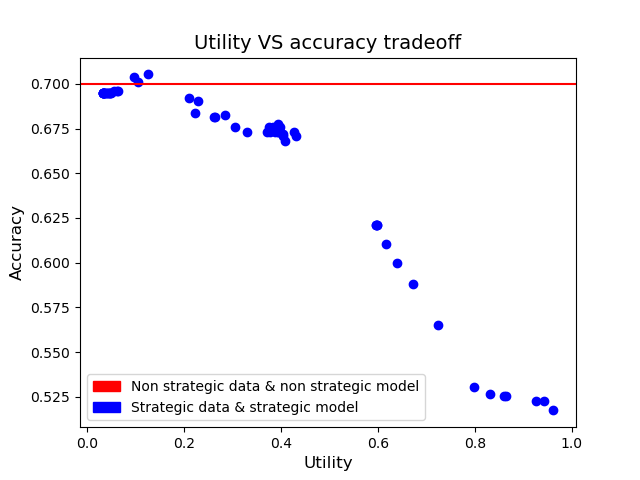

C:\Users\sagil\Anaconda3\envs\funcPred\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [87]:
utilities = []
accuracies = []
path = "C:/Users/sagil/Desktop/nir_project/models/FINAL/utility/tradeoff"

for root,d_names,f_names in os.walk(path):
    if "val_utilities.csv" in f_names:
        val_utilities = pd.read_csv(root + '/val_utilities.csv')
        utility = val_utilities.values[-1][1]
        utilities.append(utility)
        val_errors = pd.read_csv(root + '/val_errors.csv')
        acc = 1 - val_errors.values[-1][1]
        accuracies.append(acc)


fig = plt.figure()

plt.rc('axes', titlesize=BIG_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.title('Utility VS accuracy tradeoff')
plt.xlabel('Utility')
plt.ylabel('Accuracy')
ax = fig.add_subplot(111)
ax.scatter(utilities, accuracies, color='b')
plt.axhline(y=0.7, linestyle='-', color='r')

red_patch = mpatches.Patch(color='r', label='Non strategic data & non strategic model')
blue_patch = mpatches.Patch(color='b', label='Strategic data & strategic model')

plt.legend(handles=[red_patch, blue_patch])
# plt.savefig(path + '/utility_vs_accuracy.pdf', format='pdf')
# plt.savefig(path + '/utility_vs_accuracy.eps', format='eps')
# plt.savefig(path + '/utility_vs_accuracy.png', format='png')
plt.show()

# Recourse VS accuracy

<IPython.core.display.Javascript object>


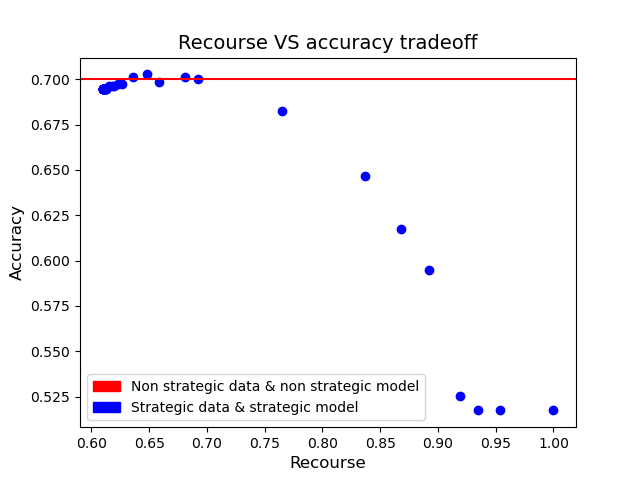

C:\Users\sagil\Anaconda3\envs\funcPred\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [86]:
recourses = []
accuracies = []
path = "C:/Users/sagil/Desktop/nir_project/models/FINAL/recourse/tradeoff"

for root,d_names,f_names in os.walk(path):
    if "val_recourses.csv" in f_names:
        val_recourses = pd.read_csv(root + '/val_recourses.csv')
        recourse = val_recourses.values[-1][1]
        recourses.append(recourse)
        val_errors = pd.read_csv(root + '/val_errors.csv')
        acc = 1 - val_errors.values[-1][1]
        accuracies.append(acc)


fig = plt.figure()

plt.rc('axes', titlesize=BIG_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.title('Recourse VS accuracy tradeoff')
plt.xlabel('Recourse')
plt.ylabel('Accuracy')
ax = fig.add_subplot(111)
ax.scatter(recourses, accuracies, color='b')
plt.axhline(y=0.7, linestyle='-', color='r')

red_patch = mpatches.Patch(color='r', label='Non strategic data & non strategic model')
blue_patch = mpatches.Patch(color='b', label='Strategic data & strategic model')

plt.legend(handles=[red_patch, blue_patch])
# plt.savefig(path + '/recourse_vs_accuracy.pdf', format='pdf')
# plt.savefig(path + '/recourse_vs_accuracy.eps', format='eps')
# plt.savefig(path + '/recourse_vs_accuracy.png', format='png')
plt.show()

# Vanilla I

<IPython.core.display.Javascript object>


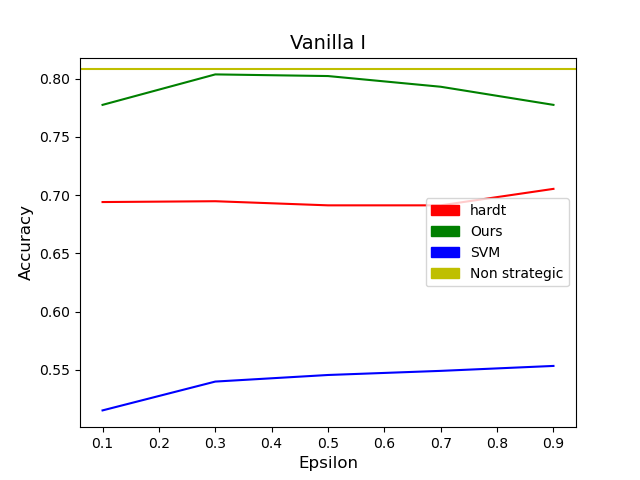

C:\Users\sagil\Anaconda3\envs\funcPred\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [50]:
path = "C:/Users/sagil/Desktop/nir_project/models/FINAL/vanilla_I/vanilla_vs_hardt"

non_strategic_acc = 0
epsilons = []
hardt_acc = []
ours_acc = []
svm_acc = []

for root,d_names,f_names in os.walk(path):
    if "results.csv" in f_names:
        details = root.split("\\")
        epsilon = float(details[-1])
        acc = pd.read_csv(root + '/results.csv')
        acc = acc.values[:, 1]
        epsilons.append(epsilon)
        non_strategic_acc = acc[0]
        hardt_acc.append(acc[1])
        ours_acc.append(acc[2])
        svm_acc.append(acc[3])

        
fig = plt.figure()

plt.rc('axes', titlesize=BIG_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.title('Vanilla I')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
ax = fig.add_subplot(111)
ax.plot(epsilons, hardt_acc, color='r')
ax.plot(epsilons, ours_acc, color='g')
ax.plot(epsilons, svm_acc, color='b')

plt.axhline(y=non_strategic_acc, linestyle='-', color='y')

red_patch = mpatches.Patch(color='r', label='Hardt')
green_patch = mpatches.Patch(color='g', label='Ours')
blue_patch = mpatches.Patch(color='b', label='SVM')
yellow_patch = mpatches.Patch(color='y', label='Non strategic')

plt.legend(handles=[red_patch, green_patch, blue_patch, yellow_patch])

# plt.savefig(path + '/recourse_vs_accuracy.pdf', format='pdf')
# plt.savefig(path + '/recourse_vs_accuracy.eps', format='eps')
# plt.savefig(path + '/recourse_vs_accuracy.png', format='png')
plt.show()
        

# Vanilla II

<IPython.core.display.Javascript object>


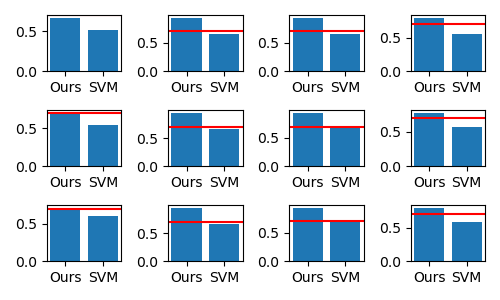

In [51]:
path = "C:/Users/sagil/Desktop/nir_project/models/FINAL/vanilla_II"
all_results = dict()

for root,d_names,f_names in os.walk(path):
    if "results.csv" in f_names:
        details = root.split("\\")
        scale = details[-1]
        dataset = details[-3]
        acc = pd.read_csv(root + '/results.csv')
        acc = acc.values[:, 1]
        if (scale, dataset) not in all_results:
            all_results[(scale, dataset)] = np.zeros(3)
        all_results[(scale, dataset)] += acc
        
for key in all_results:
    all_results[key] /= 3

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(5, 3))

for i, (scale, dataset) in enumerate(all_results):
    row = i % 3
    col = i // 3
    axes[row, col].bar(["Ours", "SVM"], all_results[(scale, dataset)][1:])
    axes[row, col].axhline(y=0.7, linestyle='-', color='r')
    
fig.tight_layout()

plt.show()

# Flexibility

In [59]:
path = "C:/Users/sagil/Desktop/nir_project/models/FINAL/flexibility/simple"

accuracies = pd.read_csv(path + '/results.csv')
accuracies = accuracies.values[:, 1]
non_strategic_acc = accuracies[0]
oracle_acc = accuracies[1]
fixed_acc = accuracies[2]
flexible_acc = accuracies[3]

print(non_strategic_acc, oracle_acc, fixed_acc, flexible_acc)

1.0 1.0 0.7166666666666667 0.9666666666666668


# Robustness

In [60]:
path = "C:/Users/sagil/Desktop/nir_project/models/FINAL/robustness/simple"

accuracies = pd.read_csv(path + '/results.csv')
accuracies = accuracies.values[:, 1]
non_strategic_acc = accuracies[0]
oracle_acc = accuracies[1]
robust_acc = accuracies[2]
naive_acc = accuracies[3]

print(non_strategic_acc, oracle_acc, naive_acc, robust_acc)

1.0 0.9833333333333332 0.8833333333333333 1.0


# RNN

<IPython.core.display.Javascript object>


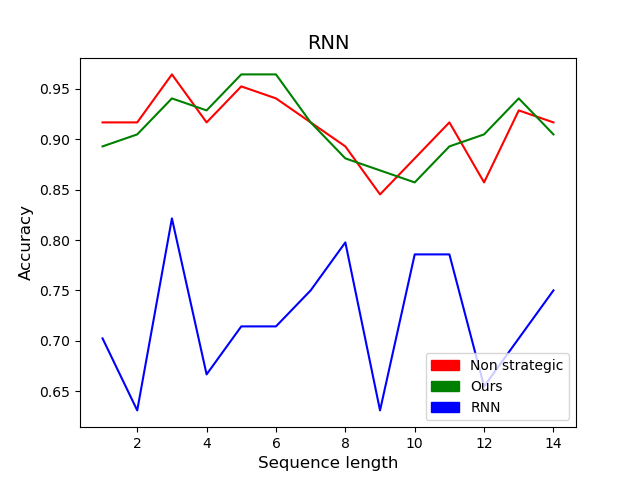

C:\Users\sagil\Anaconda3\envs\funcPred\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [78]:
path = "C:/Users/sagil/Desktop/nir_project/models/FINAL/rnn/lengths_comparison"

lengths = []
non_strategic_acc = []
ours_acc = []
rnn_acc = []

for root,d_names,f_names in os.walk(path):
    if "results.csv" in f_names:
        details = root.split("\\")
        seq_len = int(details[-1])
        acc = pd.read_csv(root + '/results.csv')
        acc = acc.values[:, 1]
        lengths.append(seq_len)
        non_strategic_acc.append(acc[0])
        ours_acc.append(acc[1])
        rnn_acc.append(acc[2])
                
lengths = np.array(lengths)
p = lengths.argsort()
lengths = lengths[p]
non_strategic_acc = np.array(non_strategic_acc)[p]
ours_acc = np.array(ours_acc)[p]
rnn_acc = np.array(rnn_acc)[p]


fig = plt.figure()

plt.rc('axes', titlesize=BIG_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.title('RNN')
plt.xlabel('Sequence length')
plt.ylabel('Accuracy')
ax = fig.add_subplot(111)
ax.plot(lengths, non_strategic_acc, color='r')
ax.plot(lengths, ours_acc, color='g')
ax.plot(lengths, rnn_acc, color='b')

red_patch = mpatches.Patch(color='r', label='Non strategic')
green_patch = mpatches.Patch(color='g', label='Ours')
blue_patch = mpatches.Patch(color='b', label='RNN')

plt.legend(handles=[red_patch, green_patch, blue_patch])

# plt.savefig(path + '/recourse_vs_accuracy.pdf', format='pdf')
# plt.savefig(path + '/recourse_vs_accuracy.eps', format='eps')
# plt.savefig(path + '/recourse_vs_accuracy.png', format='png')
plt.show()

# Utility violin

<IPython.core.display.Javascript object>


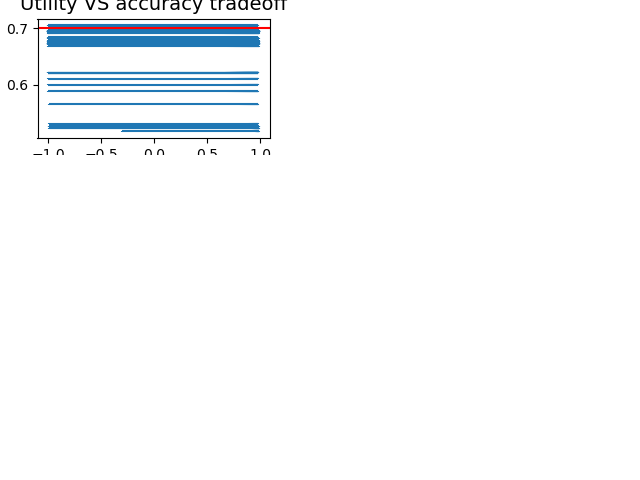

C:\Users\sagil\Anaconda3\envs\funcPred\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [130]:
utilities = []
accuracies = []
path = "C:/Users/sagil/Desktop/nir_project/models/FINAL/utility/tradeoff"

all_utilities = pd.read_csv(path + '/all_utilities.csv')
all_utilities = all_utilities.values[:, 1:]

for root,d_names,f_names in os.walk(path):
    if "val_utilities.csv" in f_names:
        val_utilities = pd.read_csv(root + '/val_utilities.csv')
        utility = val_utilities.values[-1][1]
        utilities.append(utility)
        val_errors = pd.read_csv(root + '/val_errors.csv')
        acc = 1 - val_errors.values[-1][1]
        accuracies.append(acc)
        

fig = plt.figure()

plt.rc('axes', titlesize=BIG_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.title('Utility VS accuracy tradeoff')
plt.xlabel('Utility')
plt.ylabel('Accuracy')
ax = fig.add_subplot(111)

ax.violinplot(all_utilities.tolist(), accuracies, vert=False, points=750, widths=0.004,
                      showmeans=True, showextrema=True, showmedians=False)
plt.axhline(y=0.7, linestyle='-', color='r')

plt.show()